<a href="https://colab.research.google.com/github/Anastasya2701/telecom-project/blob/main/model_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

***Model selection: Random Forest***

 • Random Forest performs well with tabular data, has a built-in feature
importance function, and effectively handles mixed data types.

 • Random Forest is suitable for classification tasks, especially when dealing with imbalanced data. It works well with a large number of features and helps prevent overfitting due to its ensemble mechanism.

In [2]:
uploaded = files.upload()

Saving preprocessed_dataset.csv to preprocessed_dataset.csv


In [3]:
df = pd.read_csv('preprocessed_dataset.csv')

In [4]:
X = df.drop(columns=['churn'])
y = df['churn']

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,test_size=0.5, random_state=42, stratify=y_temp)

In [6]:
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators' : [100, 200],
    'max_depth' : [None, 10, 20],
    'min_samples_split' : [2, 5],
    'min_samples_leaf' : [1, 2]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [7]:
best_rf = grid_search.best_estimator_

In [8]:
y_pred = best_rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80      3119
           1       0.86      0.82      0.84      4120

    accuracy                           0.82      7239
   macro avg       0.82      0.82      0.82      7239
weighted avg       0.82      0.82      0.82      7239



In [9]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2586  533]
 [ 755 3365]]


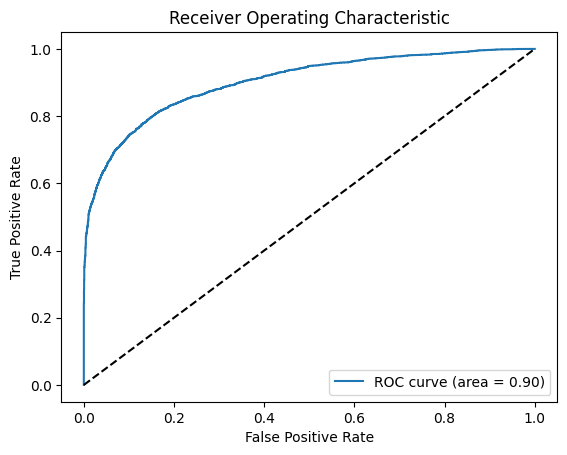

In [10]:
y_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

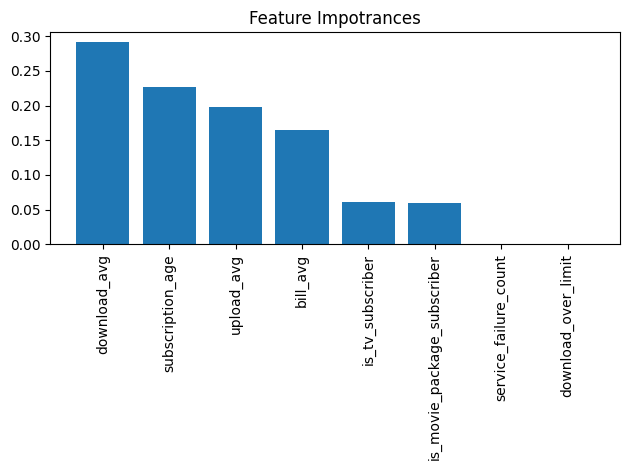

In [11]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure()
plt.title("Feature Impotrances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

Random Forest Model Summary

1. Model Performance

The Random Forest model was trained using GridSearchCV to tune its hyperparameters. The best combination of hyperparameters for the model is:
 • min_samples_leaf = 2
 • n_estimators = 200
 • random_state = 42

Model evaluation on the test set:
 • Accuracy: 0.82 — the proportion of correctly classified examples.
 • Precision:
 • For class 0: 0.77
 • For class 1: 0.86
This metric shows how precise the model is when predicting classes (particularly for the “churn” class).
 • Recall:
 • For class 0: 0.83
 • For class 1: 0.82
Recall indicates how effectively the model captures all examples of each class.
 • F1 Score:
 • For class 0: 0.80
 • For class 1: 0.84
F1 Score is the harmonic mean of Precision and Recall.

Confusion Matrix:
 • True Positives (TP): 3365
 • True Negatives (TN): 2586
 • False Positives (FP): 533
 • False Negatives (FN): 755

These results indicate that the model effectively separates both classes, although there are some false positives (FP) and false negatives (FN).

2. ROC Curve and AUC

The model achieved a high AUC score of 0.90, indicating strong ability to distinguish between classes (churn/non-churn), even with varying thresholds.

The ROC curve demonstrates the model’s strong capability to predict classes across different thresholds.

3. Key Features of the Random Forest Model

Advantages:
 • Stability: The model generalizes well, even with complex data dependencies.
 • Accuracy: High Precision and Recall metrics for both classes.
 • Flexibility: It handles imbalanced data well due to its ability to adjust weights.

Limitations:
 • Training Time: Training with a large number of trees can be time-consuming.
 • Interpretability: While Random Forest provides feature importance, explaining specific decisions made by the model can be challenging.

4. Conclusion

The Random Forest model demonstrated strong classification performance, with high Precision, Recall, and F1 Score values. The confusion matrix highlights the model’s ability to effectively separate both classes.

The AUC score of 0.90 confirms the model’s excellent classification capability, while cross-validation ensures its stability and generalizability.

This model is an optimal choice for the customer churn classification task, especially when a balance between precision and the ability to detect churn cases is crucial.